In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


print(os.path.abspath(os.curdir))



C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927


In [3]:
os.chdir('./AMLS_19-20_SN16072927')
# os.chdir('./A1')
print(os.path.abspath(os.curdir))

C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927\AMLS_19-20_SN16072927


In [4]:
from data_preprocessing import get_data_A1

tr_X_A1, te_X_A1, tr_Y_A1, te_Y_A1 = get_data_A1()

In [8]:
from sklearn.model_selection import GridSearchCV

def SVM_A1(training_images, training_labels, test_images, test_labels):
    
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100]}, 
                        {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100]},
                        {'kernel': ['linear'], 'C': [1, 10, 100]}
                        ]
    
    classifierA1 = GridSearchCV(svm.SVC(), tuned_parameters, n_jobs=-1)       #gridsearchCV use 5 k-fold by default
    classifierA1.fit(training_images, training_labels)

# default score of SVM is accuracy
    print("Best SVM parameter:", classifierA1.best_params_)
    print("Best SVM score:", classifierA1.best_score_)
      
    
    results = pd.concat([pd.DataFrame(classifierA1.cv_results_["params"]),pd.DataFrame(classifierA1.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
    print(results)  
    
# make prediction using the best classifier
    predA1 = classifierA1.best_estimator_.predict(test_images)
    
    return predA1 


model_A1 = SVM_A1(tr_X_A1, tr_Y_A1, te_X_A1, te_Y_A1)

Best SVM parameter: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best SVM score: 0.9190975907450648
      C   gamma  kernel  degree  Accuracy
0     1  0.0010     rbf     NaN  0.895297
1     1  0.0001     rbf     NaN  0.860792
2    10  0.0010     rbf     NaN  0.917903
3    10  0.0001     rbf     NaN  0.894404
4   100  0.0010     rbf     NaN  0.919098
5   100  0.0001     rbf     NaN  0.918796
6     1     NaN    poly     2.0  0.716545
7     1     NaN    poly     3.0  0.872096
8    10     NaN    poly     2.0  0.744797
9    10     NaN    poly     3.0  0.897380
10  100     NaN    poly     2.0  0.726355
11  100     NaN    poly     3.0  0.884295
12    1     NaN  linear     NaN  0.914040
13   10     NaN  linear     NaN  0.912852
14  100     NaN  linear     NaN  0.911364


In [10]:
print("Accuracy:", accuracy_score(te_Y_A1, model_A1))

Accuracy: 0.9167244968771686


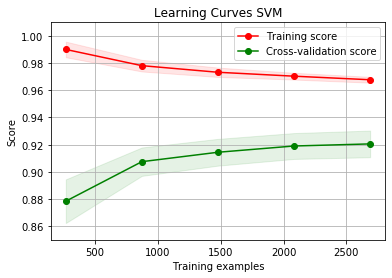

In [11]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves SVM"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel='rbf', gamma=1e-3, C=100)
X, y = tr_X_A1, tr_Y_A1 
plot_learning_curve(estimator, title, X, y, (0.85, 1.01), cv=cv, n_jobs=-1)

plt.show()

# default test score for SVM is accuracy

[[641  69]
 [ 51 680]]


<function matplotlib.pyplot.show(*args, **kw)>

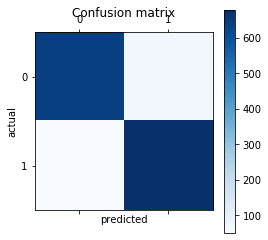

In [13]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


cf = confusion_matrix(te_Y_A1, model_A1)
print(cf)

cmap = plt.cm.Blues

plt.matshow(cf, cmap = cmap)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show